Instalamos las librerias a utiliza

In [651]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import argparse
import openpyxl


Agregamos la base de datos con la cual vamos a trabajar en el proyecto

In [652]:
#cargamos la base de excel
df = pd.read_excel('C:/Users/jdfr1/Segmentaci-n_inteligente_abogados/Base_Datos.xlsx')
df.head()

,CLASE DE PROCESO (LABORALES),CIUDAD,JUZGADO,REGION,FECHA (PRESENTACIÓN DEMANDA),AÑO DEMANDA,RADICADO,RADICADO CONSULTA,RED,TIPO RELACIÓN,...,MONTO DE LA PROVISION (EN MILLONES) 2024,MONTO TOTAL DE LA PROVISIÓN,FECHA ESTIMADA DE PAGO,APODERADO BANCO,% PROVISIÓN Años anteriores\n,% PROVISION 2024,TOTAL % PROVISIÓN,HONORARIOS (en SMLV),APODERADO ACTOR,OBSERVACIONES
0,Ordinario,Medellin,23,Antioquia,NaT,2021,2021-02060,0050013105023202102060,BIC,Extrabajador,...,250000000,250000000,NaN,Carlos Eduardo Ortiz,NaN,1.0,1.0,8.0,Francisco Javier Herrera Sánchez,NaN
1,Ordinario,Medellin,20,Antioquia,2019-01-31,2019,2019-00043,05001310502020190004300,Banco de Colombia,Extrabajador,...,0,70000000,2021-11-15 00:00:00,Juan Felipe Molina Alvarez,1.0,0.0,1.0,8.0,Oscar Darío Ríos Ospina,NaN
2,Ordinario,Medellin,4,Antioquia,2020-10-20,2020,2019- 00267,050013105004201900267-,Banco de Colombia,Extrabajador,...,150000000,150000000,NaN,Carlos Eduardo Ortiz,NaN,1.0,1.0,8.0,Juliana Acevedo Gil,NaN
3,Ordinario,Medellin,21,Antioquia,2021-09-10,2021,2021-00345,0050013105021202100345,Bancolombia,Extrabajador,...,150000000,150000000,NaN,Carlos Eduardo Ortiz,NaN,1.0,1.0,8.0,Francisco Alberto Giraldo Luna,NaN
4,Ordinario,Apartadó,1,Antioquia,2021-07-13,2021,2021-00353,05045310510500120210035300-,Bancolombia,Extrabajador,...,250000000,250000000,NaN,Carlos Eduardo Ortiz,NaN,1.0,1.0,8.0,Reinaldo Rueda - Equilatero,NaN


In [653]:
#tamaño de la base
df.shape

(262, 34)

In [654]:
#conocemos la estructura de la base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 34 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   CLASE  DE PROCESO (LABORALES)                        262 non-null    object        
 1   CIUDAD                                               261 non-null    object        
 2   JUZGADO                                              262 non-null    object        
 3   REGION                                               262 non-null    object        
 4   FECHA (PRESENTACIÓN DEMANDA)                         256 non-null    datetime64[ns]
 5   AÑO DEMANDA                                          262 non-null    int64         
 6   RADICADO                                             261 non-null    object        
 7   RADICADO CONSULTA                                    260 non-null    object        
 8   

Es interesante evidenciar como tenemos diferentes tipos de datos que pueden ser valiosos para el modelo de clasificación, donde, tenemos datos de fecha para revisar tendencias, tenemos datos enteros, y también tenemos tipo objetc; Además se evidencia un gran reto porque en algunos de los campos se evidencia un volumen alto de nulos.

In [655]:
#tamaño de la base y los campos
df.shape

(262, 34)

Haciendo un analisis completo de cada uno de los campos, entendiendo con el experto del negocio, vamos a hacer depuración de algunos de estos

In [656]:
#Eliminar algunos campos del dataset que no aportan valor al modelo
df = df.drop(columns=['CÓDIGO DEPARTAMENTO JUZGADO', 'CÓDIGO MUNICIPIO JUZGADO', 'CÓDIGO DEPARTAMENTO CLIENTE', 'CÓDIGO MUNICIPIO CLIENTE', 'CÓDIGO DEPARTAMENTO CONTRAPARTE', 'CÓDIGO MUNICIPIO CONTRAPARTE', 'VALOR PROVISIÓN INICIAL', 'VALOR PROVISIÓN ACTUALIZADA', 'VALOR PROVISIÓN FINAL', 'FECHA PROVISIÓN INICIAL', 'FECHA PROVISIÓN ACTUALIZADA', 'FECHA PROVISIÓN FINAL', 'FECHA ÚLTIMA ACTUALIZACIÓN PROCESO'])

KeyError: "['CÓDIGO DEPARTAMENTO JUZGADO', 'CÓDIGO MUNICIPIO JUZGADO', 'CÓDIGO DEPARTAMENTO CLIENTE', 'CÓDIGO MUNICIPIO CLIENTE', 'CÓDIGO DEPARTAMENTO CONTRAPARTE', 'CÓDIGO MUNICIPIO CONTRAPARTE', 'VALOR PROVISIÓN INICIAL', 'VALOR PROVISIÓN ACTUALIZADA', 'VALOR PROVISIÓN FINAL', 'FECHA PROVISIÓN INICIAL', 'FECHA PROVISIÓN ACTUALIZADA', 'FECHA PROVISIÓN FINAL', 'FECHA ÚLTIMA ACTUALIZACIÓN PROCESO'] not found in axis"

Es importante resaltar que pasamos de 38 a 15 campos, la justificación de la depuración de los campos es: son campos que no generan valor al modelo porque son codigos de ubicación del juzgado, son provisiones internas que hace la organización (pero el pago real es el final), campos que más de la mitad de sus registros están nulos.

C:\Users\jdfr1\AppData\Local\Temp\ipykernel_53736\252704829.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='AÑO DEMANDA', palette='viridis')


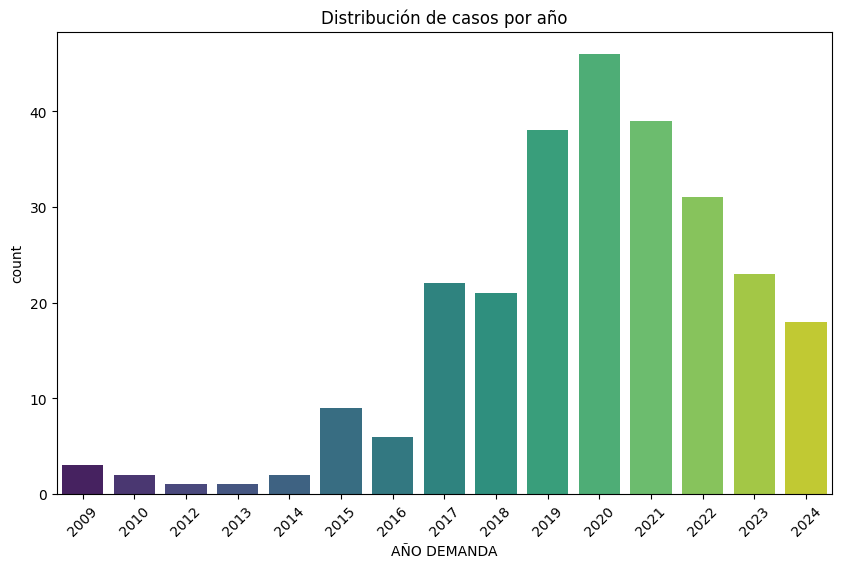

In [ ]:
#grafico con el campo años
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='AÑO DEMANDA', palette='viridis')
plt.title('Distribución de casos por año')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#conozcamos las estadisticas descriptivas de todos los campos
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
CLASE DE PROCESO (LABORALES),262,2,Ordinario,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CIUDAD,261,38,Bogota,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JUZGADO,262.0,47.0,1.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REGION,262,5,Bogota,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FECHA (PRESENTACIÓN DEMANDA),256,NaN,NaN,NaN,2020-05-08 05:31:52.500000,2009-05-21 00:00:00,2019-01-07 12:00:00,2020-09-23 12:00:00,2022-05-14 18:00:00,2024-11-21 00:00:00,NaN
AÑO DEMANDA,262.0,NaN,NaN,NaN,2019.79771,2009.0,2018.0,2020.0,2022.0,2024.0,2.793176
RADICADO,261,259,2017-00149,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RADICADO CONSULTA,260,259,0050013105015202000074,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RED,262,6,Bancolombia,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TIPO RELACIÓN,260,6,Extrabajador,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se evidencia un gran reto con los campos por los siguientes motivos:
1. Mucha presencia de datos  nulos
2. Campos categoricos tienen muchos niveles
3. Campos numericos tienen valores negativos
4. La base tiene muchos años de historia, revisando el campo años, se tienen datos desde 1905, entendiendo el contexto, tomaremos datos desde año 2000.

In [ ]:
#Atendiendo los puntos anteriores, se eliminan los años anteriores a 2000, por campo AÑO DEMANDA Y PRESENTACIÓN DEMANDA
df = df[df['AÑO DEMANDA'] >= 2000]
df = df[df['FECHA (PRESENTACIÓN DEMANDA)'].dt.year >= 2000]
df.shape

(256, 34)

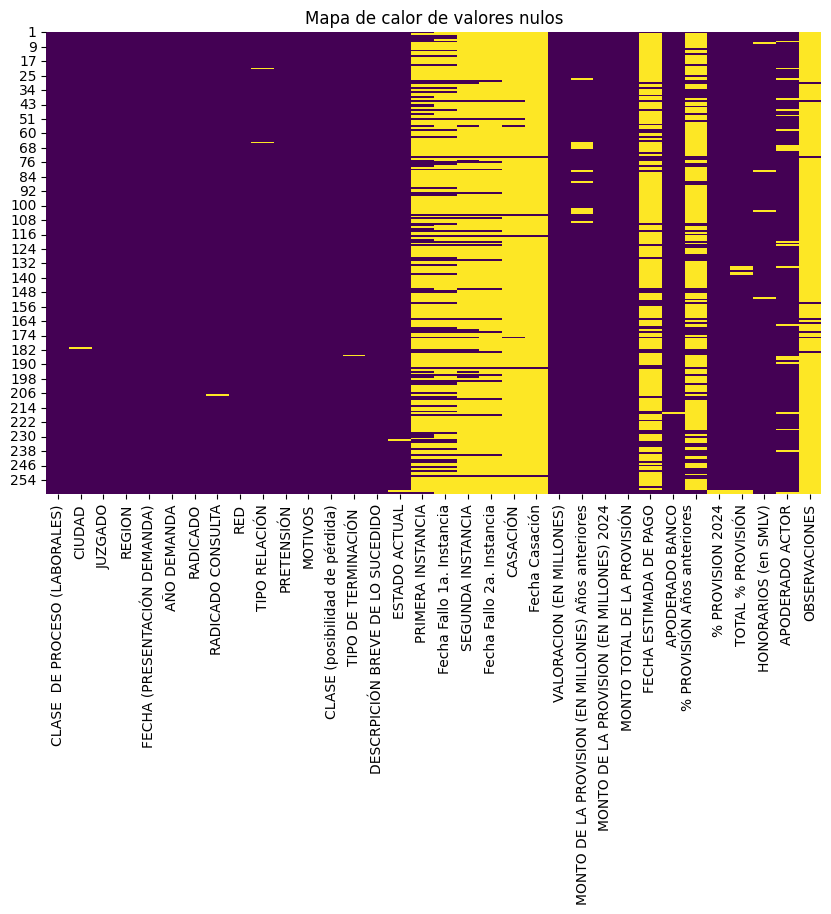

In [ ]:
#analicemos los campos nulos graficamente
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores nulos')
plt.show()


De acuerdo al gráfico anterior, se puede afirmar que los campos: Motivos2, valor pretenciones en pesos y causa tienen muchos nulos (alredor del 40%) y si tratamos de imputar con algún método pordríamos estar generando ruido en la variable y por ende en el modelo.

In [ ]:
#eliminamos entonces los campos MOTIVOS2, VALOR PRETENCIONES EN PESOS y CAUSA
df = df.drop(columns=['MOTIVOS2', 'VALOR PRETENSIONES (EN $)', 'CAUSA'])
df.shape


KeyError: "['MOTIVOS2', 'VALOR PRETENSIONES (EN $)', 'CAUSA'] not found in axis"

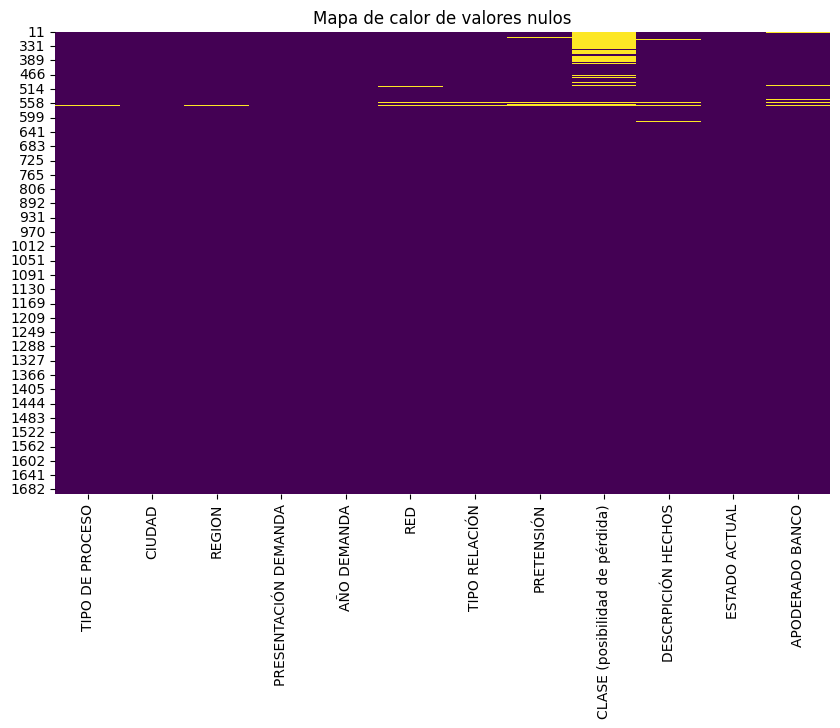

In [ ]:
#Realizamos de nuevo el grafico de nulos
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores nulos')
plt.show()

In [ ]:
#Conozcamos a detalle las variables, empecemos por TIPO DE PROCESO
df['TIPO DE PROCESO'].value_counts()

TIPO DE PROCESO
Ordinario          1089
Especial             90
ordinario            25
Ordinario            17
ESPECIAL             12
especial              5
Odinario              4
Unica                 4
Ejecutivo             3
ejecutivo             3
Especial              2
0rdinario             1
Ordinario U.I.        1
Ejecitivo             1
Única Instancia       1
Fuero                 1
Name: count, dtype: int64

In [ ]:
#Es importante homolgar, en este caso, ordinario sería: Ordinario, Ordinario, Ordinario, Odinario, 0rdinario, Ordinario U.I.
#Es importante homolgar, en este caso, Especial sería: ESPECIAL, especial, Especial,ESPECIAL,
#Es importante homolgar, en este caso, Ejecutivo sería: ejecutivo, Ejecitivo
#El resto de casos homologarlos en Unico, sería:Unica, Única Instancia, Fuero 
df['TIPO DE PROCESO'] = df['TIPO DE PROCESO'].replace({'ordinario': 'Ordinario', 'Ordinario ': 'Ordinario', 'Odinario': 'Ordinario', '0rdinario': 'Ordinario', 'Ordinario U.I.': 'Ordinario'})
df['TIPO DE PROCESO'] = df['TIPO DE PROCESO'].replace({'ESPECIAL': 'Especial', 'especial': 'Especial', 'Especial ': 'Especial'})
df['TIPO DE PROCESO'] = df['TIPO DE PROCESO'].replace({'ejecutivo': 'Ejecutivo', 'Ejecitivo': 'Ejecutivo'})
df['TIPO DE PROCESO'] = df['TIPO DE PROCESO'].replace({'Unica': 'Unico', 'Única Instancia': 'Unico', 'Fuero ': 'Unico'})
df['TIPO DE PROCESO'].value_counts()

TIPO DE PROCESO
Ordinario    1137
Especial      109
Ejecutivo       7
Unico           6
Name: count, dtype: int64

In [ ]:
#revisamos los nulos del campo TIPO DE PROCESO
df['TIPO DE PROCESO'].isnull().sum()

np.int64(1)

In [ ]:
#Imputamos los nulos del campo TIPO DE PROCESO con la moda
df['TIPO DE PROCESO'] = df['TIPO DE PROCESO'].fillna(df['TIPO DE PROCESO'].mode()[0])   
#Validamos la imputación del campo TIPO DE PROCESO
df['TIPO DE PROCESO'].isnull().sum()

np.int64(0)

C:\Users\jdfr1\AppData\Local\Temp\ipykernel_53736\2488937106.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TIPO DE PROCESO', palette='viridis', order=df['TIPO DE PROCESO'].value_counts().index)


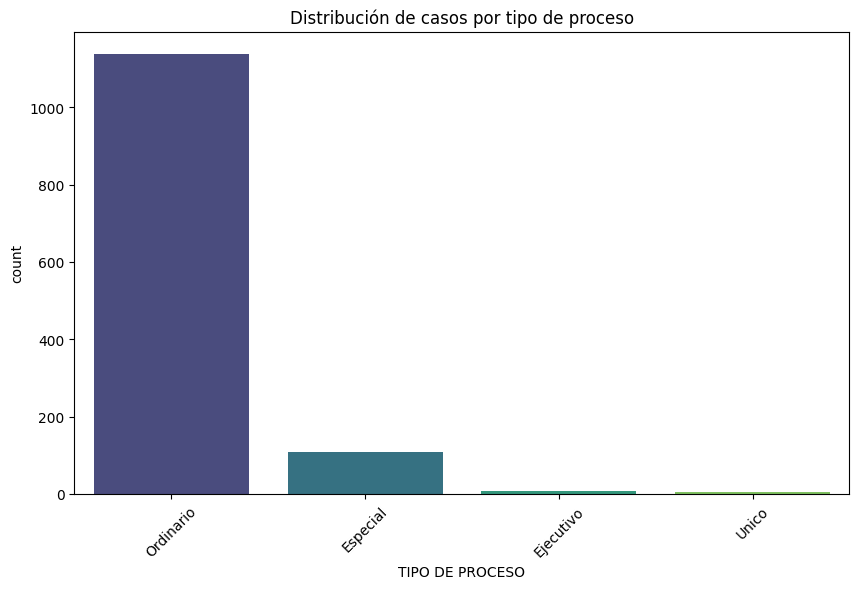

In [ ]:
#Finalmente, graficamos la distribución de los casos por tipo de proceso
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='TIPO DE PROCESO', palette='viridis', order=df['TIPO DE PROCESO'].value_counts().index)
plt.title('Distribución de casos por tipo de proceso')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#relaizamos ananlisis y conteo de la variable ciudad

#convertimos a minusculas
df['CIUDAD'] = df['CIUDAD'].str.lower()

#imputamos los nulos con la moda
df['CIUDAD'] = df['CIUDAD'].fillna(df['CIUDAD'].mode()[0])

In [ ]:
df['CIUDAD'].value_counts()

CIUDAD
bogota          334
medellin        258
cali             63
cucuta           52
barranquilla     50
               ... 
socorro           1
malaga            1
pto. berrio       1
garagoa           1
cali              1
Name: count, Length: 86, dtype: int64

C:\Users\jdfr1\AppData\Local\Temp\ipykernel_53736\1674130605.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['CIUDAD'].isin(top_10_ciudades)], y='CIUDAD', palette='viridis', order=top_10_ciudades)


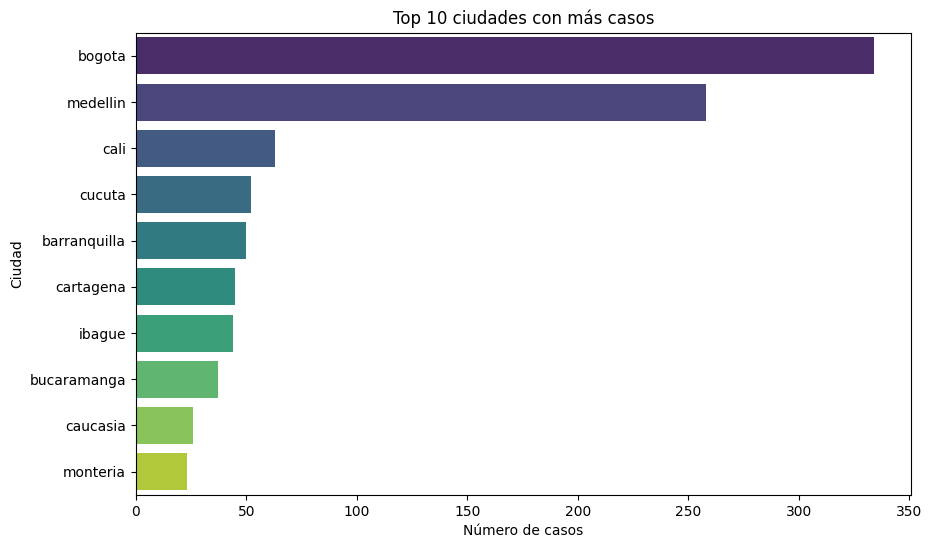

In [ ]:
#realizamos grafica de barras para el top 10 de la  variable ciudad
plt.figure(figsize=(10,6))
top_10_ciudades = df['CIUDAD'].value_counts().nlargest(10).index
sns.countplot(data=df[df['CIUDAD'].isin(top_10_ciudades)], y='CIUDAD', palette='viridis', order=top_10_ciudades)
plt.title('Top 10 ciudades con más casos')  
plt.xlabel('Número de casos')
plt.ylabel('Ciudad')
plt.show()



In [ ]:
#hacer un conteo por cada ciudad
df['CIUDAD'].value_counts()


CIUDAD
bogota          334
medellin        258
cali             63
cucuta           52
barranquilla     50
               ... 
socorro           1
malaga            1
pto. berrio       1
garagoa           1
cali              1
Name: count, Length: 86, dtype: int64

In [ ]:
#conocer el campo región e identificar si tiene campo nulos
df['REGION'].isnull().sum()

np.int64(1)

In [ ]:
#Imputamos los nulos del campo REGION con la moda
df['REGION'] = df['REGION'].fillna(df['REGION'].mode()[0])
#Validamos la imputación del campo REGION
df['REGION'].isnull().sum()

np.int64(0)

C:\Users\jdfr1\AppData\Local\Temp\ipykernel_53736\1974913234.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='REGION', palette='viridis', order=df['REGION'].value_counts().index)


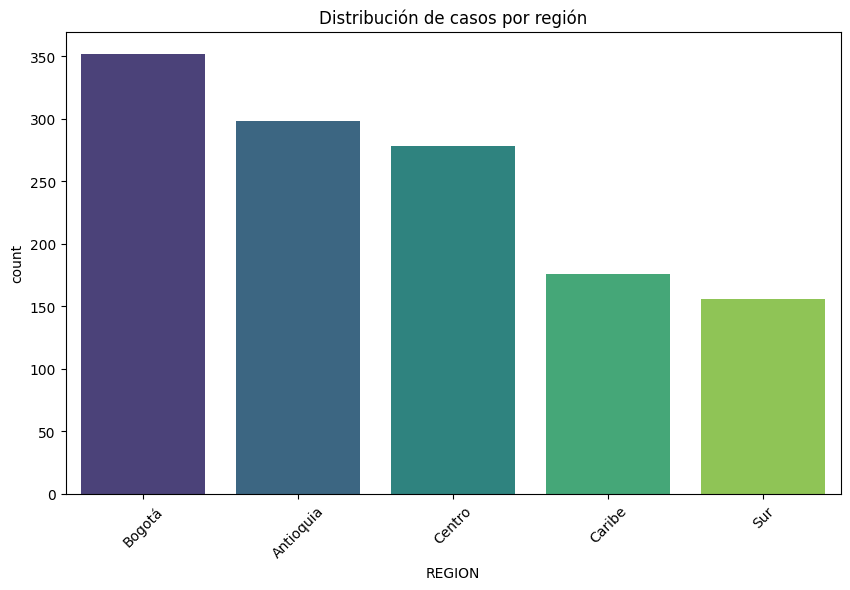

In [ ]:
#Conozcamos el campo REGION,  a continuación grafico de la distribución:
df['REGION'].value_counts()
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='REGION', palette='viridis', order=df['REGION'].value_counts().index)
plt.title('Distribución de casos por región')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Vamos a analizar los campos de fecha que tenemos en el dataset, tenemos el campo PRESENTACIÓN DE DEMANDA y AÑO DE DEMANDA,  realmente son campos que pueden ser complementarios, aunque con la fecha completa podríamos encontrar tendencias a través de los meses.
#Empecemos analizando el AÑO DE DEMANDA
df['AÑO DEMANDA'].value_counts()


AÑO DEMANDA
2003.0    117
2000.0     87
2001.0     70
2017.0     69
2016.0     66
2015.0     65
2008.0     64
2007.0     64
2018.0     60
2010.0     59
2009.0     59
2004.0     56
2002.0     56
2013.0     54
2011.0     51
2005.0     50
2006.0     47
2014.0     41
2019.0     36
2012.0     29
2020.0     25
2021.0     20
2022.0     13
2023.0      2
Name: count, dtype: int64

In [ ]:
#convertir el campo AÑO DEMANDA a entero
df['AÑO DEMANDA'] = df['AÑO DEMANDA'].astype(int)


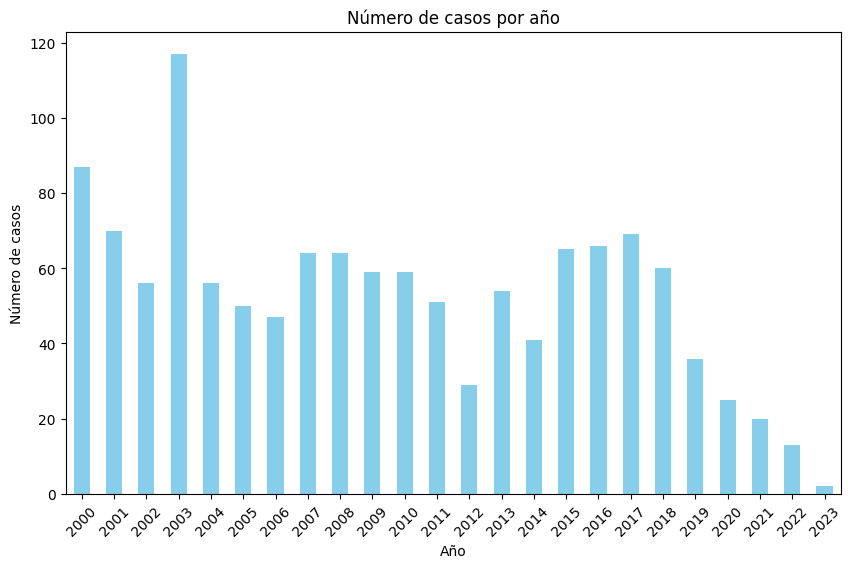

In [ ]:
#Se evidencia en el gráfico anterior que no tenemos año nulos, por lo tanto no es necesario hacer ninguna imputación, ahora conozcamos el volumen de casos por año 
df['AÑO DEMANDA'].value_counts().sort_index().plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Número de casos por año')
plt.xlabel('Año')
plt.ylabel('Número de casos')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#El AÑO DE DEMANDA es un campo importante para el analisis y nos permitirá ver evolución de los casos en el tiempo, ahora vamos a ver el campo de PRESENTACIÓN DE DEMANDA, primero identificamos los vacios
df['PRESENTACIÓN DEMANDA'].isnull().sum()



np.int64(0)

In [ ]:
#Tenemos 9 registros de fechas vacios, vamos a conocer cuales son:
df[df['PRESENTACIÓN DEMANDA'].isnull()]

,TIPO DE PROCESO,CIUDAD,REGION,PRESENTACIÓN DEMANDA,AÑO DEMANDA,RED,TIPO RELACIÓN,PRETENSIÓN,CLASE (posibilidad de pérdida),DESCRPICIÓN HECHOS,ESTADO ACTUAL,APODERADO BANCO


In [ ]:
#Se evidencia que las fechas que están vacias si tienen registrado el campo año, entonces se decide imputar las fechas nulas con el 31 de diciembre del año correspondiente
df.loc[df['PRESENTACIÓN DEMANDA'].isnull(), 'PRESENTACIÓN DEMANDA'] = df.loc[df['PRESENTACIÓN DEMANDA'].isnull(), 'AÑO DEMANDA'].apply(lambda x: pd.Timestamp(f'{x}-12-31'))    


C:\Users\jdfr1\AppData\Local\Temp\ipykernel_53736\4240480157.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.loc[df['PRESENTACIÓN DEMANDA'].isnull(), 'PRESENTACIÓN DEMANDA'] = df.loc[df['PRESENTACIÓN DEMANDA'].isnull(), 'AÑO DEMANDA'].apply(lambda x: pd.Timestamp(f'{x}-12-31'))


In [ ]:
#Revisamos de nuevo que no tengamos nulos
df['PRESENTACIÓN DEMANDA'].isnull().sum()

np.int64(0)

C:\Users\jdfr1\AppData\Local\Temp\ipykernel_53736\48123549.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').size().plot(figsize=(12,6), color='skyblue')


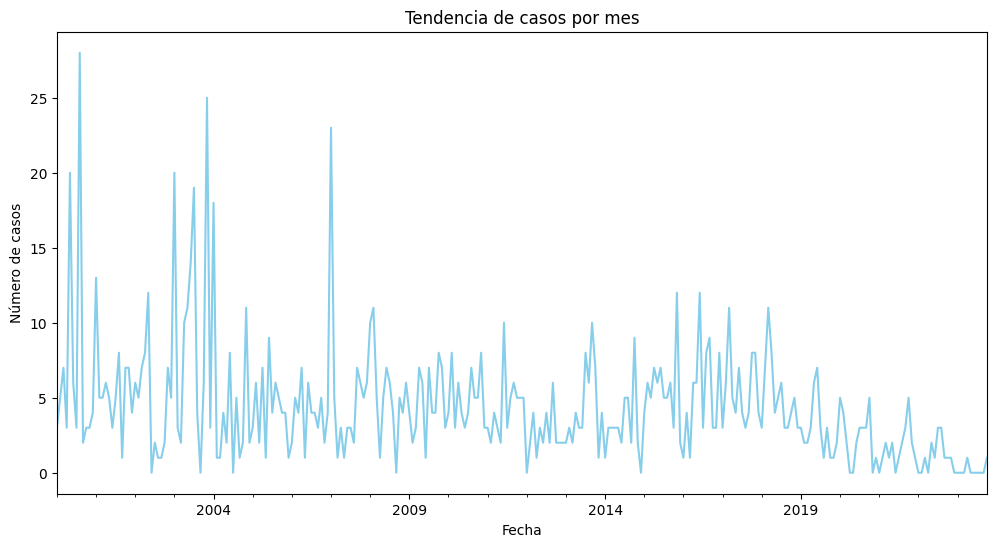

In [ ]:
#Efectivamente ya no tenemos nulos en el campo PRESENTACIÓN DEMANDA, conocer la tendencia de los datos, grafico lineal de tendencia por meses
df['PRESENTACIÓN DEMANDA'] = pd.to_datetime(df['PRESENTACIÓN DEMANDA'], errors='coerce')
df.set_index('PRESENTACIÓN DEMANDA', inplace=True)
df.resample('M').size().plot(figsize=(12,6), color='skyblue')
plt.title('Tendencia de casos por mes')
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.show()


In [ ]:
#Vamos a analizar el campo RED, vamos a conocer que información tiene el campo
df['RED'].value_counts()


RED
Banco de Colombia              466
Bancolombia                    398
Colombia                       102
BIC                            100
Conavi                          79
Ninguno                         58
bic                             20
conavi                          19
Bic                              4
Sin establecer                   4
Leasing                          4
CORFINSURA                       1
Banco Industrial Colombiano      1
Name: count, dtype: int64

In [ ]:
#Se puede evidencia que este campo tiene problemas de homolagación, por lo tanto se decide homologar el campo con las clases que efectivamente deberían tener, para este caso: sería:
#El campo Bancolombia, sería: Bancolombia, Colombia, Leasing
df['RED'] = df['RED'].replace({'Colombia ': 'Bancolombia', 'Bancolombia ': 'Bancolombia', 'Leasing': 'Bancolombia', 'Colombia': 'Bancolombia'})


#El campo BIC, sería: BIC, bic, Bic
df['RED'] = df['RED'].replace({'BIC': 'BIC', 'bic': 'BIC', 'Bic': 'BIC'})

#El campo Conavi, sería: Conavi, conavi, 
df['RED'] = df['RED'].replace({'Conavi': 'Conavi', 'Conavi': 'conavi'})

#El campo otros, sería: Ninguno, Sin establecer, CORFINSURA, Banco industrial Colombiano,Banco Industrial Colombiano
df['RED'] = df['RED'].replace({'Sin establecer': 'Otros', 'CORFINSURA': 'Otros', 'Ninguno': 'Otros', 'Banco industrial Colombia': 'Otros','Banco Industrial Colombiano': 'Otros'})



In [ ]:
df['RED'].value_counts()

RED
Bancolombia          504
Banco de Colombia    466
BIC                  124
conavi                98
Otros                 64
Name: count, dtype: int64

In [ ]:
#validamos los nulos del campo RED
df['RED'].isnull().sum()

np.int64(4)

In [ ]:
#los 4 nulos los vamos a imputar con la moda
df['RED'] = df['RED'].fillna(df['RED'].mode()[0])

In [ ]:
#Validamos la imputación del campo RED
df['RED'].isnull().sum()

np.int64(0)

C:\Users\jdfr1\AppData\Local\Temp\ipykernel_53736\51525961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RED', palette='viridis', order=df['RED'].value_counts().index)


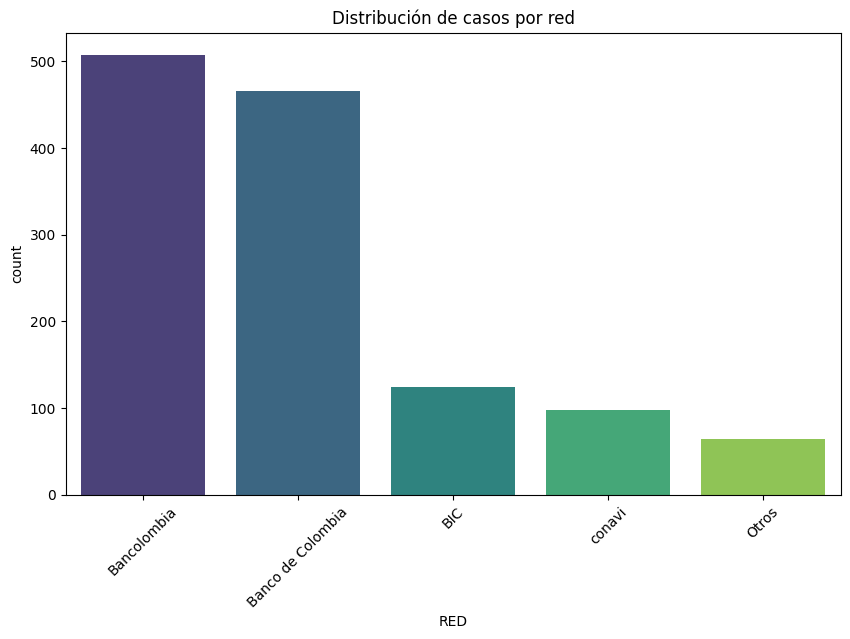

In [ ]:
#después de todo el proceso de limpieza, graficamos el campo para conocer su distribución
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='RED', palette='viridis', order=df['RED'].value_counts().index)
plt.title('Distribución de casos por red')              
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Conozcamos a detalle el campo TIPO RELACIÓN
df['TIPO RELACIÓN'].value_counts()

TIPO RELACIÓN
Extrabajador     935
Trabajador       190
Ninguna           58
Jubilado          48
trabajador        10
Sobreviviente     10
Gestor             3
Corretaje          1
conavi             1
ninguna            1
Name: count, dtype: int64

In [ ]:
#Se puede evidenciar que el campo tiene muchas clases que se deben homologar, teniendo en cuenta:
#El campo Jubilado, debe incluir: Extrabajador, Jubilado
df['TIPO RELACIÓN'] = df['TIPO RELACIÓN'].replace({'Extrabajador': 'Jubilado', 'Jubilado ': 'Jubilado'})

#El campo empleados, debe incluir:Trabajador, trabajador
df['TIPO RELACIÓN'] = df['TIPO RELACIÓN'].replace({'Trabajador': 'Empleado', 'trabajador': 'Empleado'})

#El resto de las clases, deben incluirse en Otros: Ninguna, Sobreviviente, Gestor, Corretaje, conavi, ninguna,
df['TIPO RELACIÓN'] = df['TIPO RELACIÓN'].replace({'Ninguna': 'Otros', 'Sobreviviente': 'Otros', 'Gestor': 'Otros', 'Corretaje': 'Otros', 'conavi': 'Otros', 'ninguna': 'Otros'})


In [ ]:
#validar finalmene como quedan las clases:
df['TIPO RELACIÓN'].value_counts()

TIPO RELACIÓN
Jubilado    983
Empleado    200
Otros        74
Name: count, dtype: int64

In [ ]:
#identificar si hay nulos en el campo TIPO RELACIÓN
df['TIPO RELACIÓN'].isnull().sum()

np.int64(3)

In [ ]:
#Los 3 nulos los vamos a imputar con la moda
df['TIPO RELACIÓN'] = df['TIPO RELACIÓN'].fillna(df['TIPO RELACIÓN'].mode()[0]) 

In [ ]:
#Validamos la imputacion
df['TIPO RELACIÓN'].isnull().sum()

np.int64(0)

C:\Users\jdfr1\AppData\Local\Temp\ipykernel_53736\2208322921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='TIPO RELACIÓN', palette='viridis', order=df['TIPO RELACIÓN'].value_counts().index)


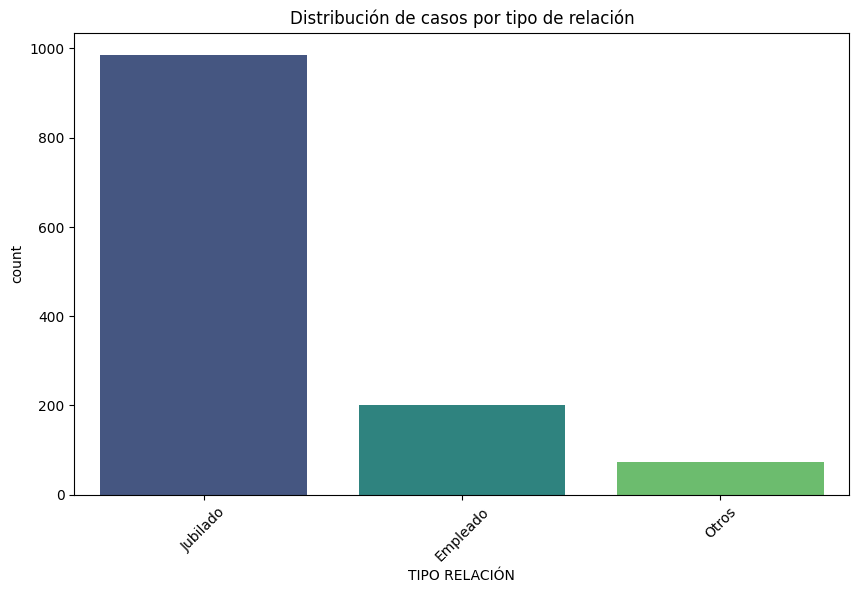

In [ ]:
#después de realizar todo el proceso de limpieza del campo TIPO RELACIÓN, graficamos la distribución de los casos
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='TIPO RELACIÓN', palette='viridis', order=df['TIPO RELACIÓN'].value_counts().index)
plt.title('Distribución de casos por tipo de relación')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Vamos a conocer el campo PRETENCIÓN, conozcamos las clases que tiene
df['PRETENSIÓN'].value_counts()


PRETENSIÓN
INDEMNIZACION DSJC                                    213
Jubilacion                                             89
INDEMNIZACIÓN DSJC                                     89
Indemnizacion dsjc                                     70
TITULO PENSIONAL - COTIZACIÓN AL ISS                   61
                                                     ... 
RELIQUIDACIÓN PRESTACIONES SOCIALES                     1
INDEMNIZACION DSJC - MORATORIA                          1
REINTEGRO Y RELIQUIDACIÓN DE PRESTACIONES SOCIALES      1
REINTEGRO - CASO SALUD                                  1
BENEFICIOS CONVENCIONALES                               1
Name: count, Length: 156, dtype: int64

In [ ]:
#Identificar los campos nulos
df['PRETENSIÓN'].isnull().sum()

np.int64(6)

In [ ]:
#los 6 campos nulos los vamos a imputar con la moda
df['PRETENSIÓN'] = df['PRETENSIÓN'].fillna(df['PRETENSIÓN'].mode()[0])

#Validamos la imputación del campo PRETENSIÓN
df['PRETENSIÓN'].isnull().sum()

np.int64(0)

In [ ]:
#Analizamos el campo CLASE (posibilidad de pérdida), identificamos los campos nulos
df['CLASE (posibilidad de pérdida)'].isnull().sum()

np.int64(95)

In [ ]:
#hemos identificado 95 campos nulos, siguiendo con el mismo criterio, vamos a imputar con la moda
df['CLASE (posibilidad de pérdida)'] = df['CLASE (posibilidad de pérdida)'].fillna(df['CLASE (posibilidad de pérdida)'].mode()[0])  
#Validamos la imputación del campo CLASE (posibilidad de pérdida)
df['CLASE (posibilidad de pérdida)'].isnull().sum()

np.int64(0)

In [ ]:
#conocemos las clases de este campo
df['CLASE (posibilidad de pérdida)'].value_counts()

CLASE (posibilidad de pérdida)
Problable                                                                              864
Eventual                                                                               356
Remota                                                                                  39
el ersultado es muy inciertoy  por tanto la probailidad de fallo adverso es latente      1
Name: count, dtype: int64

In [ ]:
#de acuerdo a la descripción de cada clase, se identifica la necesidad de homogar y dejar solo 3 clases, probable, eventual y retoma, así que hacemos los siguientes cambios:
#El campo probable, incluiría: Problable, el ersultado es muy inciertoy  por tanto la probailidad de fallo adverso es latente
df['CLASE (posibilidad de pérdida)'] = df['CLASE (posibilidad de pérdida)'].replace({'Problable': 'probable', 'el ersultado es muy inciertoy  por tanto la probailidad de fallo adverso es latente': 'probable'})


#valimos como queda el campo
df['CLASE (posibilidad de pérdida)'].value_counts()



CLASE (posibilidad de pérdida)
probable    865
Eventual    356
Remota       39
Name: count, dtype: int64

In [ ]:
#Vamos a validar que ya no tengamos nulos en el dataset
df.isnull().sum()

TIPO DE PROCESO                    0
CIUDAD                             0
REGION                             0
AÑO DEMANDA                        0
RED                                0
TIPO RELACIÓN                      0
PRETENSIÓN                         0
CLASE (posibilidad de pérdida)     0
DESCRPICIÓN HECHOS                13
ESTADO ACTUAL                      0
APODERADO BANCO                    9
dtype: int64